<a href="https://colab.research.google.com/github/NAVEED261/MY-AI-ASSISTANT/blob/main/module_4_use_cases_of_command.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture --no-stderr
%pip install -U langchain_google_genai langgraph langchain

In [ ]:
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph, START,END
from langgraph.graph.state import CompiledStateGraph
from IPython.display import Image
import random
from langgraph.types import Command, Interrupt
from typing_extensions import TypedDict
from typing import Annotated,Literal,Optional,List
from langgraph.graph.message import add_messages

In [ ]:
class state(TypedDict):
  address:str
  nearby_home:Optional[List[dict]]
  messages:Annotated[List,add_messages]

In [ ]:
def node_A(state:state)->Command[Literal["search_nearby_home","Question_answer"]]:
  print("call to node_A",state)

  value = random.choices(["search_nearby_home","Question_aswer"])

  if value == "search_nearby_home":
    goto   =  "search_nearby_home"
  else:
    goto = "Question_answer"
    return Command(
        goto = goto
    )

def search_nearby_home(state:state):
  print("call to search_nearby_home")
  return{"nearby_home":[{"home_1":"fatima zehra house"},{"home_2":"umaima gul house"}]}

def Question_answer(state:state):
  print("call to Question_answer")
  return{"messages":[AIMessage(content = "system is down due to network issue plz try again letter")]}

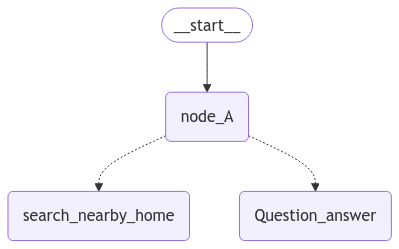

In [ ]:
builder=StateGraph(state)
builder.add_node("node_A",node_A)
builder.add_node("search_nearby_home",search_nearby_home)
builder.add_node("Question_answer",Question_answer)
builder.add_edge(START, "node_A")
graph = builder.compile()
Image(graph.get_graph().draw_mermaid_png())


In [ ]:
response = graph.invoke({"address":"karachi"})
print('\n[finalresposne]', response)

call to node_A {'address': 'karachi', 'messages': []}
call to Question_answer

[finalresposne] {'address': 'karachi', 'messages': [AIMessage(content='system is down due to network issue plz try again letter', additional_kwargs={}, response_metadata={}, id='a0fe7326-764f-4ab9-b432-4d96087ddb76')]}


In [ ]:
class state(TypedDict):
  address:str
  nearby_home:Optional[List[dict]]
  messages:Annotated[List,add_messages]
  user_data:Optional[dict]

In [ ]:
def node_A(state:state)->Command[Literal["search_nearby_home","Question_answer"]]:
  print("call to node_A",state)

  value = random.choices(["search_nearby_home","Question_aswer"])

  fetching_data = {"name":"hafiz naveed uddin"}

  if value == "search_nearby_home":
    goto   =  "search_nearby_home"
  else:
    goto = "Question_answer"

    return Command(
      update={"user_data": fetching_data},
      goto = goto
  )

def search_nearby_home(state:state):
  print("call to search_nearby_home")
  print("user_info",state["user_data"])
  return{"nearby_home":[{"home_1":"fatima zehra house"},{"home_2":"umaima gul house"}]}

def Question_answer(state:state):
  print("call to Question_answer")
  print("user_info",state["user_data"])
  user_name = state["user_data"].get("name","guest")
  return{"messages":[AIMessage(content = f' welcome to {user_name} we are searching your home ')]}

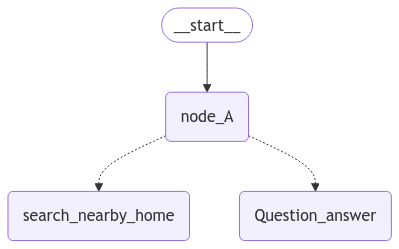

In [ ]:
builder=StateGraph(state)
builder.add_node("node_A",node_A)
builder.add_node("search_nearby_home",search_nearby_home)
builder.add_node("Question_answer",Question_answer)
builder.add_edge(START, "node_A")
graph = builder.compile()
Image(graph.get_graph().draw_mermaid_png())


In [ ]:
response = graph.invoke({"address":"karachi"})
print('\n[finalresposne]', response)

call to node_A {'address': 'karachi', 'messages': []}
call to Question_answer
user_info {'name': 'hafiz naveed uddin'}

[finalresposne] {'address': 'karachi', 'messages': [AIMessage(content=' welcome to hafiz naveed uddin we are searching your home ', additional_kwargs={}, response_metadata={}, id='c1fad051-1308-4b44-9633-1d6c8c6fb7f4')], 'user_data': {'name': 'hafiz naveed uddin'}}


In [ ]:
class state(TypedDict):
  address:str
  nearby_home:Optional[List[dict]]
  messages:Annotated[List,add_messages]
  user_data:Optional[dict]

In [ ]:
def node_A(state:state)->Command[Literal["search_by_near_home","question_answer","realstate_agent"]]:
  print("call to node_A")

  fetching_data ={"name":"Hafiz Naveed uddin"}

  value = random.choices(["search_by_near_home","question_answer","realstate_agent"])
  if value == "search_by_near_home":
    goto =    "search_by_near_home"
  else:
    goto =      "question_answer"

  return Command(
      update={"user_data": fetching_data},
      goto = ["search_by_near_home","question_answer","realstate_agent"]
  )

def search_by_near_home(state:state):
  print("call to search_by_near_home")
  print("user_info",state["user_data"])
  return{"nearby_home":[{"home_1":"fatima zehra"},{"home_2":"umaima gul"}]}

def question_answer(state:state):
  print("called to question_answer")
  print("user_info",state["user_data"])
  user_name = state["user_data"].get("name","guest")
  return {"messages": [AIMessage(content=f"Hi, {user_name} Welcome to Homes AI Search Engine")]}
def realstate_agent(state: state):
    """
    This node might talk like a real estate agent,
    analyze user data, or do any advanced logic.
    We'll just do a simple example.
    """
    print("Call to realstate_agent!")
    print("user_info",state["user_data"])
    user_name = state["user_data"].get("name","guest")

    recommendation = (
        f"Hello {user_name}, based on your budget and address '{state['address']}', "
        "I recommend checking out the newly listed 2-bedroom apartment in your area."
    )

    # We'll store it in the new key 'agent_recommendation'
    return {"agent_recommendation": recommendation}



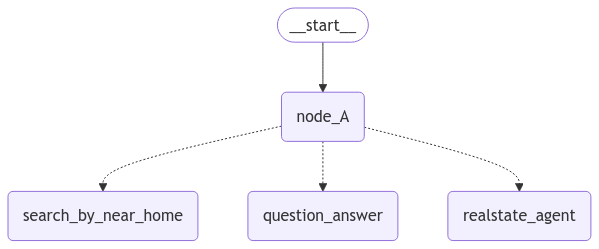

In [ ]:
builder = StateGraph(state)
builder.add_edge(START, "node_A")
builder.add_node(node_A)
builder.add_node(search_by_near_home)
builder.add_node(question_answer)
builder.add_node(realstate_agent)
# NOTE: there are no edges between nodes A, B and C!

graph = builder.compile()


from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))


In [ ]:
response1 = graph.invoke({"address":"islamabad"})
print('\n[finalresposne]', response1)

call to node_A
call to search_by_near_home
user_info {'name': 'Hafiz Naveed uddin'}
called to question_answer
user_infoCall to realstate_agent!
user_info {'name': 'Hafiz Naveed uddin'}
 {'name': 'Hafiz Naveed uddin'}

[finalresposne] {'address': 'islamabad', 'nearby_home': [{'home_1': 'fatima zehra'}, {'home_2': 'umaima gul'}], 'messages': [AIMessage(content='Hi, Hafiz Naveed uddin Welcome to Homes AI Search Engine', additional_kwargs={}, response_metadata={}, id='119a0f0c-d924-4a2e-8cdf-69fd39f40b89')], 'user_data': {'name': 'Hafiz Naveed uddin'}}


In [ ]:
response1

{'address': 'islamabad',
 'nearby_home': [{'home_1': 'fatima zehra'}, {'home_2': 'umaima gul'}],
 'messages': [AIMessage(content='Hi, Hafiz Naveed uddin Welcome to Homes AI Search Engine', additional_kwargs={}, response_metadata={}, id='119a0f0c-d924-4a2e-8cdf-69fd39f40b89')],
 'user_data': {'name': 'Hafiz Naveed uddin'}}

In [ ]:
from typing_extensions import TypedDict
from typing import Literal
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display

from langgraph.types import Command, interrupt



In [ ]:
class State(TypedDict):
    input: str

In [ ]:
def human_approval(state) -> Command[Literal["__end__", "call_agent"]]:
    print("---human_feedback---")

    is_approved = interrupt("Is this correct?")

    print("\n\n[RESUME AFTER INTERRUPT:]\n\n", is_approved)

    if is_approved == "yes":
        return Command(goto="call_agent")
    else:
        return Command(goto="__end__")


def call_agent(state):
    print("---call_agent 3---")
    pass



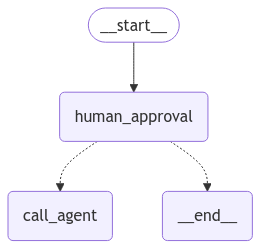

In [ ]:
builder = StateGraph(State)
builder.add_node("human_approval", human_approval)
builder.add_node("call_agent", call_agent)

builder.add_edge(START, "human_approval")

# Set up memory
memory = MemorySaver()

# Add
graph = builder.compile(checkpointer=memory)

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
initial_input = {"input": "hello from UMT Lahore"}

# Thread
thread = {"configurable": {"thread_id": "11122232"}}

# Run the graph until the first interruption
for event in graph.stream(initial_input, thread, stream_mode="update"):
    print(event)
    print("\n")

---human_feedback---


In [ ]:
for event in graph.stream(
    Command(resume="yes"),
    thread,
    stream_mode="updates"
):
    print(event)
    print("\n")

---human_feedback---


[RESUME AFTER INTERRUPT:]

 yes
{'human_approval': None}


---call_agent 3---
{'call_agent': None}


